<a href="https://colab.research.google.com/github/BrilliantChard/100-days-of-tensorflow/blob/main/Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Importing the relvant Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
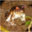

In [8]:
X_train[0]

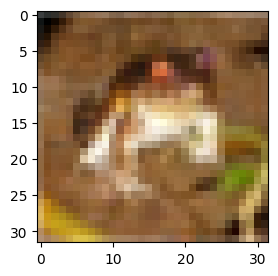

In [9]:
plt.figure(figsize=(5,3))
plt.imshow(X_train[0])

      Reshape the y_train

In [10]:
y_train = y_train.reshape(-1, )

In [11]:
y_train.shape

(50000,)

In [12]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

**Explatory Data Analysis**

In [13]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [14]:
classes[9]

'truck'

In [15]:
def plot_sample(x, y, index):
  plt.figure(figsize=(10, 3))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

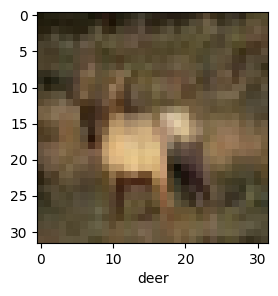

In [16]:
plot_sample(X_train, y_train, 3)

      Normalizing the Data

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
X_test.shape

(10000, 32, 32, 3)

In [23]:
X_train = X_train/255
X_test = X_test/255

# **Building Artificial Neural Network**

In [38]:
my_model = models.Sequential([
    # CNN
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Dense
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
my_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [40]:
my_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 36ms/step - accuracy: 0.3884 - loss: 1.6828
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6144 - loss: 1.0985
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.6768 - loss: 0.9225
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7155 - loss: 0.8077
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.7512 - loss: 0.7206
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7725 - loss: 0.6482
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7973 - loss: 0.5769
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.8187 - loss: 0.5184
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 37ms/step - accuracy: 0.8375 - loss: 0.4601
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.8579 - loss: 0.4033


In [41]:
my_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6925 - loss: 1.0460


[1.037901520729065, 0.6978999972343445]

In [42]:
from sklearn.metrics import classification_report

In [43]:
y_pred=my_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [44]:
print('Classification report: \n', classification_report(y_test, y_pred_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.71      0.78      0.75      1000
           1       0.74      0.87      0.80      1000
           2       0.59      0.56      0.58      1000
           3       0.57      0.42      0.48      1000
           4       0.61      0.71      0.66      1000
           5       0.67      0.56      0.61      1000
           6       0.79      0.74      0.76      1000
           7       0.72      0.78      0.75      1000
           8       0.82      0.77      0.79      1000
           9       0.73      0.78      0.75      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

